## [Dacon] AI프렌즈 시즌1 온도 추정 경진대회
## _____ 모델 깎는 노인
## 2020년 월 일 (제출날짜)

# 모델링 코드 작성방법

A 코드 관련

1) 입상자는 코드 제출 필수. 제출 코드는 예측 결과를 리더보드 점수로 복원할 수 있어야 함

2) 코드 제출시 확장자가 R user는 .R or .rmd. Python user는 .py or .ipynb

3) 코드에 ‘/data’ 데이터 입/출력 경로 포함 제출 or R의 경우 setwd(" "), python의 경우 os.chdir을 활용하여 경로 통일

4) 전체 프로세스를 일목요연하게 정리하여 주석을 포함하여 하나의 파일로 제출

5) 모든 코드는 오류 없이 실행되어야 함(라이브러리 로딩 코드 포함되어야 함).

6) 코드와 주석의 인코딩은 모두 UTF-8을 사용하여야 함

B 외부 데이터

1) 본 대회에는 어떠한 외부데이터 사용이 불가합니다.

## 1. 라이브러리 및 데이터
## Library & Data

In [1]:
# 기본
import sys, warnings
import re
import os
import datetime

# 시각화

import matplotlib.pyplot as plt
from matplotlib import rc 
import seaborn as sns
from IPython.display import display

# 데이터 처리

import pandas as pd
import numpy as np

# 머신러닝

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from xgboost import plot_importance

import pickle
# 수학

from scipy.stats.mstats import gmean
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import random

# 딥러닝

import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.layers import GRU, Dense, Input, Dropout, ReLU
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import CustomObjectScope

C:\Users\onest\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\onest\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\onest\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\onest\Anaconda3\envs\tf2.0-gpu\lib\site-packages\ten

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 2. 데이터 전처리
## Data Cleansing & Pre-Processing  

In [3]:
X_data = pd.concat([train, test], sort=False).iloc[:,:41].reset_index()
X_data = X_data.drop(columns=['index'],axis=1)

X_data.columns=['id','Temp_1','LocPr_1','WinSp_1','WinSp_2','Rain_1','SeaPr_1','LocPr_2','Temp_2','SeaPr_2','SeaPr_3','Rain_2','Insol_1','Humid_1','WinDi_1','Insol_2','WinDi_2','Insol_3','WinDi_3','WinSp_3','Insol_4','Humid_2','Rain_3','LocPr_3','SeaPr_4','WinSp_4','WinDi_4','WinSp_5','LocPr_4','Temp_3','LocPr_5','Humid_3','Temp_4','Temp_5','SeaPr_5','Insol_5','WinDi_5','Rain_4','Humid_4','Humid_5','Rain_5']
X_data = X_data[['id','Temp_1','Temp_2','Temp_3','Temp_4','Temp_5',
   'LocPr_1','LocPr_2','LocPr_3','LocPr_4','LocPr_5',
   'SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',
   'WinSp_1','WinSp_2','WinSp_3','WinSp_4','WinSp_5',
   'WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5',
   'Rain_1','Rain_2','Rain_3','Rain_4','Rain_5',
   'Insol_1','Insol_2','Insol_3','Insol_4','Insol_5',
  'Humid_1','Humid_2','Humid_3','Humid_4','Humid_5']]

test.columns = ['id','Temp_1','LocPr_1','WinSp_1','WinSp_2','Rain_1','SeaPr_1','LocPr_2','Temp_2','SeaPr_2','SeaPr_3','Rain_2','Insol_1','Humid_1','WinDi_1','Insol_2','WinDi_2','Insol_3','WinDi_3','WinSp_3','Insol_4','Humid_2','Rain_3','LocPr_3','SeaPr_4','WinSp_4','WinDi_4','WinSp_5','LocPr_4','Temp_3','LocPr_5','Humid_3','Temp_4','Temp_5','SeaPr_5','Insol_5','WinDi_5','Rain_4','Humid_4','Humid_5','Rain_5']
#test = test.drop(columns=['Insol_2','Insol_3','Insol_4'])
test = test[['id','Temp_1','Temp_2','Temp_3','Temp_4','Temp_5',
   'LocPr_1','LocPr_2','LocPr_3','LocPr_4','LocPr_5',
   'SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',
   'WinSp_1','WinSp_2','WinSp_3','WinSp_4','WinSp_5',
   'WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5',
   'Rain_1','Rain_2','Rain_3','Rain_4','Rain_5',
   'Insol_1','Insol_2','Insol_3','Insol_4','Insol_5',
  'Humid_1','Humid_2','Humid_3','Humid_4','Humid_5']]


train.columns = ['id','Temp_1','LocPr_1','WinSp_1','WinSp_2','Rain_1','SeaPr_1','LocPr_2','Temp_2','SeaPr_2','SeaPr_3','Rain_2','Insol_1','Humid_1','WinDi_1','Insol_2','WinDi_2','Insol_3','WinDi_3','WinSp_3','Insol_4','Humid_2','Rain_3','LocPr_3','SeaPr_4','WinSp_4','WinDi_4','WinSp_5','LocPr_4','Temp_3','LocPr_5','Humid_3','Temp_4','Temp_5','SeaPr_5','Insol_5','WinDi_5','Rain_4','Humid_4','Humid_5','Rain_5','Y00','Y01','Y02',"Y03",'Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']
#train = train.drop(columns=['Insol_2','Insol_3','Insol_4'])
train = train[['id','Temp_1','Temp_2','Temp_3','Temp_4','Temp_5',
   'LocPr_1','LocPr_2','LocPr_3','LocPr_4','LocPr_5',
   'SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',
   'WinSp_1','WinSp_2','WinSp_3','WinSp_4','WinSp_5',
   'WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5',
   'Rain_1','Rain_2','Rain_3','Rain_4','Rain_5',
   'Insol_1','Insol_2','Insol_3','Insol_4','Insol_5',
  'Humid_1','Humid_2','Humid_3','Humid_4','Humid_5',
  'Y00','Y01','Y02',"Y03",'Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']]

Temperature = ['Temp_1','Temp_2','Temp_3','Temp_4','Temp_5']
Localpressure = ['LocPr_1','LocPr_2','LocPr_3','LocPr_4','LocPr_5']
Windspeed = ['WinSp_1','WinSp_2','WinSp_3','WinSp_4','WinSp_5']
Rain = ['Rain_1','Rain_2','Rain_3','Rain_4','Rain_5']
Seapressure = ['SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5']
Insolation = ['Insol_1','Insol_2','Insol_3','Insol_4','Insol_5']
Humid = ['Humid_1','Humid_2','Humid_3','Humid_4','Humid_5']
Winddirection = ['WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5']
Time = ['minute','hour','day']
Y_data =  ['Y00','Y01','Y02','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']

## 3. 탐색적 자료분석
## Exploratory Data Analysis


## - Y00-Y18의 상관관계

코드공유에 올라와 있는 **InCastle**님의 자료를 참고하였습니다.


**출처 - https://dacon.io/competitions/official/235584/codeshare/707**

In [4]:
y18 = train[~train['Y18'].isnull()]['Y18'].reset_index(drop= True)

no_y18_target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
no_y18 = train[(train['Y18'].isnull()) & (train['id'] > 3887)][no_y18_target].reset_index(drop = True)

In [5]:
check_target = pd.concat([no_y18, y18], axis = 1)
check_target.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5


Text(0.5, 1, 'Correlation Heatmap')

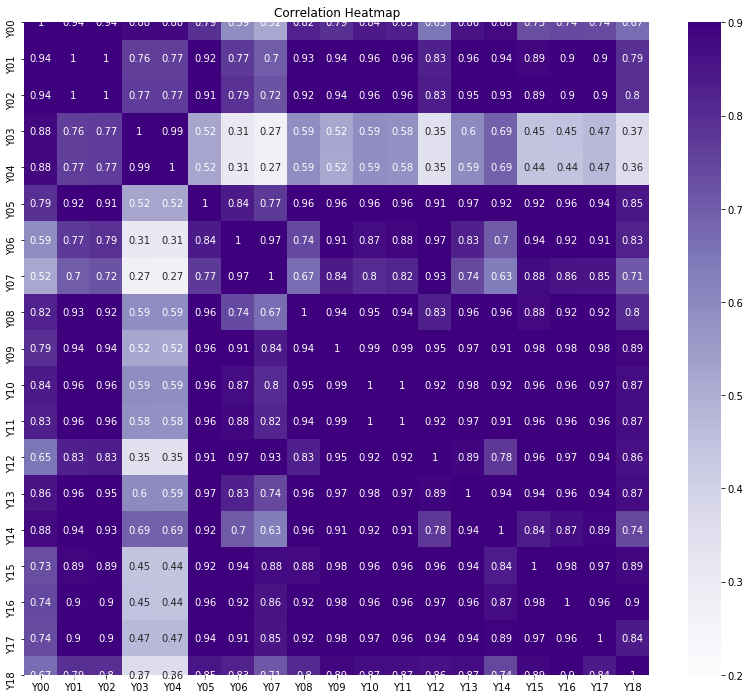

In [6]:
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = 'Purples',  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap')

### - Temperature(Temp_1 - Temp_5)

In [7]:
time =pd.DataFrame(train.id.apply(lambda x:x%144))
time.columns = ['minute']
time['hour'] = time.minute.apply(lambda x:x//6+1)
time['day'] = time.index//144+1
train = pd.concat([train,time],axis=1)

In [8]:
a = train.groupby('day')['Temp_1'].agg([('평균기온_1', 'mean')]).reset_index()
b = train.groupby('day')['Temp_2'].agg([('평균기온_2', 'mean')]).reset_index()
c = train.groupby('day')['Temp_3'].agg([('평균기온_3', 'mean')]).reset_index()
d = train.groupby('day')['Temp_4'].agg([('평균기온_4', 'mean')]).reset_index()
e = train.groupby('day')['Temp_5'].agg([('평균기온_5', 'mean')]).reset_index()

temp_day = pd.merge(a,b, left_on = 'day', right_on = 'day', how = 'left')
temp_day = pd.merge(temp_day,c, left_on = 'day', right_on = 'day', how = 'left')
temp_day = pd.merge(temp_day,d, left_on = 'day', right_on = 'day', how = 'left')
temp_day = pd.merge(temp_day,e, left_on = 'day', right_on = 'day', how = 'left')

####  일별 온도 흐름

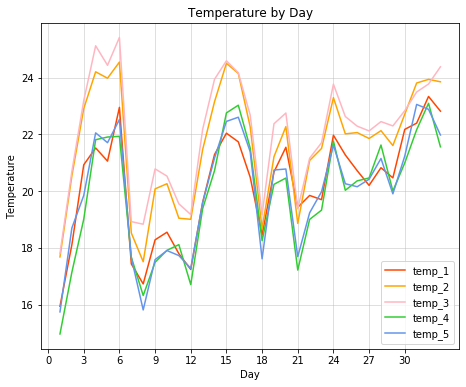

In [9]:
fig = plt.figure(figsize = (7.5,6))
ax = fig.add_subplot(1,1,1)

colors = ['orangered','orange','lightpink','limegreen','cornflowerblue']

plt.plot(temp_day.day, temp_day.평균기온_1, color = 'orangered', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_2, color = 'orange', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_3, color = 'lightpink', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_4, color = 'limegreen',linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Temperature')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5',])

plt.title('Temperature by Day')

plt.show()

#### 시간별 온도흐름

In [10]:
a = train.groupby('hour')['Temp_1'].agg([('평균기온_1', 'mean')]).reset_index()
b = train.groupby('hour')['Temp_2'].agg([('평균기온_2', 'mean')]).reset_index()
c = train.groupby('hour')['Temp_3'].agg([('평균기온_3', 'mean')]).reset_index()
d = train.groupby('hour')['Temp_4'].agg([('평균기온_4', 'mean')]).reset_index()
e = train.groupby('hour')['Temp_5'].agg([('평균기온_5', 'mean')]).reset_index()

temp_hour = pd.merge(a,b, left_on = 'hour', right_on = 'hour', how = 'left')
temp_hour = pd.merge(temp_hour,c, left_on = 'hour', right_on = 'hour', how = 'left')
temp_hour = pd.merge(temp_hour,d, left_on = 'hour', right_on = 'hour', how = 'left')
temp_hour = pd.merge(temp_hour,e, left_on = 'hour', right_on = 'hour', how = 'left')

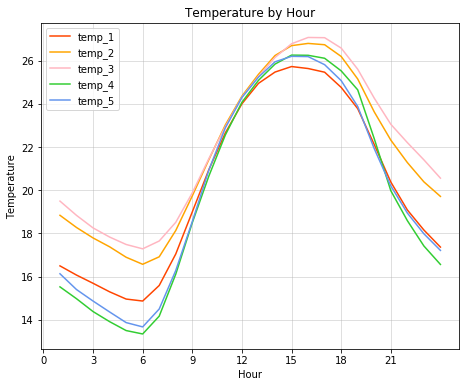

In [11]:
fig = plt.figure(figsize = (7.5,6))
ax = fig.add_subplot(1,1,1)

colors = ['orangered','orange','lightpink','limegreen','cornflowerblue']

plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'orangered', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'orange', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'lightpink', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'limegreen',linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

major_ticks_x = np.arange(0, 24, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5',])

plt.title('Temperature by Hour')

plt.show()

#### - 시간대별로 5곳의 온도는 차이는 있으나 전체적인 흐름은 유사함을 확인할 수 있다.

### - 해면기압 & 지면기압

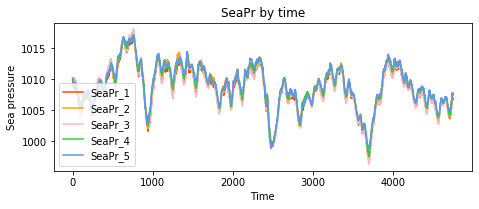

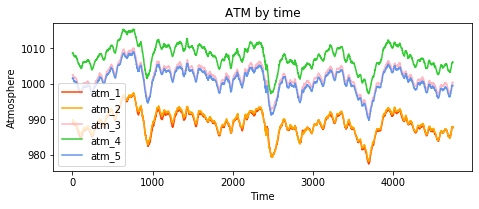

In [12]:
colors = ['orangered','orange','lightpink','limegreen','cornflowerblue']

fig = plt.figure(figsize = (7.5,6))

plt.subplot(2,1,1)

plt.plot(train.id, train.SeaPr_1, color = 'orangered', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_2, color = 'orange', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_3, color = 'lightpink',linestyle = 'solid')
plt.plot(train.id, train.SeaPr_4, color = 'limegreen', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Sea pressure')

plt.legend(['SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',])

plt.title('SeaPr by time')

fig = plt.figure(figsize = (7.5,6))

plt.subplot(2,1,2)

plt.plot(train.id, train.LocPr_1, color = 'orangered', linestyle = 'solid')
plt.plot(train.id, train.LocPr_2, color = 'orange', linestyle = 'solid')
plt.plot(train.id, train.LocPr_3, color = 'lightpink',linestyle = 'solid')
plt.plot(train.id, train.LocPr_4, color = 'limegreen', linestyle = 'solid')
plt.plot(train.id, train.LocPr_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Atmosphere')

plt.legend(['atm_1','atm_2','atm_3','atm_4','atm_5',])

plt.title('ATM by time')



plt.show()

#### - 해면기압과 지면기압은 유사한 흐름을 보이며, 순간의 변화는 적다. 역시 전반적인 흐름은 유사하다. 온도에 직접적인 영향을 끼친다고 판단하기에는 무리가 있다.

### - 풍속

Text(0.5, 0, 'Time')

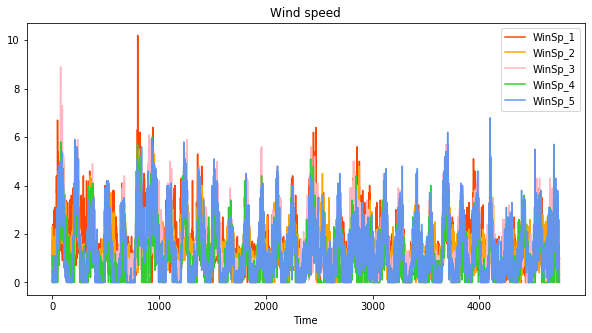

In [13]:
plt.figure(figsize=(10,5))
for i in range(len(Windspeed)):
    plt.plot(train[Windspeed[i]],color=colors[i], label=Windspeed[i])
    plt.legend()
plt.title('Wind speed')
plt.xlabel('Time')

#### - 풍속은 날씨에 따라 온도와 유의미한 관계가 발생하기도, 발생하지도 않는다. 이를 일반화하여 변수로 활용하기에는 어려움이 있음을 확인하였다.

### - 강수량

In [14]:
a = train.groupby('day')['Rain_1'].agg([('Rain_day_1', 'mean')]).reset_index()
b = train.groupby('day')['Rain_2'].agg([('Rain_day_2', 'mean')]).reset_index()
c = train.groupby('day')['Rain_3'].agg([('Rain_day_3', 'mean')]).reset_index()
d = train.groupby('day')['Rain_4'].agg([('Rain_day_4', 'mean')]).reset_index()
e = train.groupby('day')['Rain_5'].agg([('Rain_day_5', 'mean')]).reset_index()

rain_day = pd.merge(a,b, left_on = 'day', right_on = 'day', how = 'left')
rain_day = pd.merge(rain_day,c, left_on = 'day', right_on = 'day', how = 'left')
rain_day = pd.merge(rain_day,d, left_on = 'day', right_on = 'day', how = 'left')
rain_day = pd.merge(rain_day,e, left_on = 'day', right_on = 'day', how = 'left')

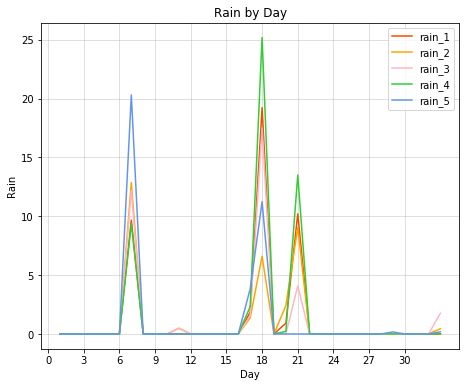

In [15]:
fig = plt.figure(figsize = (7.5,6))
ax = fig.add_subplot(1,1,1)

colors = ['orangered','orange','lightpink','limegreen','cornflowerblue']

plt.plot(rain_day.day, rain_day.Rain_day_1, color = 'orangered', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_2, color = 'orange', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_3, color = 'lightpink', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_4, color = 'limegreen',linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Rain')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['rain_1','rain_2','rain_3','rain_4','rain_5',])

plt.title('Rain by Day')

plt.show()

#### - 강수여부는 온도와 유의미한 상관관계를 갖는것으로 보인다. 뒤에서 비와 온도의 관계를 확인한다.

### - 일사량

Text(0.5, 1.0, 'Insolation Boxplot')

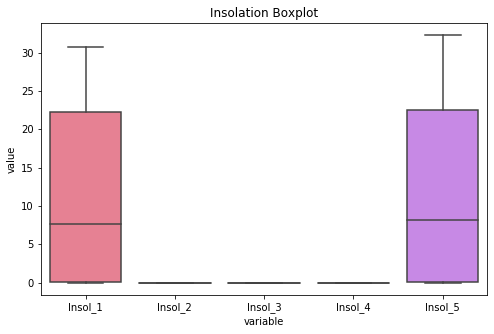

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='variable', y='value', data = pd.melt(train[Insolation]),palette='husl')
plt.title('Insolation Boxplot')

### - Insolation 2 - 4 피쳐는 모든 데이터가 0이므로 삭제한다

In [17]:
X_data = X_data.drop(['Insol_2','Insol_3','Insol_4'], axis=1)
train = train.drop(['Insol_2','Insol_3','Insol_4'], axis=1)
test = test.drop(['Insol_2','Insol_3','Insol_4'], axis=1)
Insolation = ['Insol_1','Insol_5']

In [18]:
a = train.groupby('day')['Insol_1'].agg([('Insol_day_1', 'mean')]).reset_index()
b = train.groupby('day')['Insol_5'].agg([('Insol_day_5', 'mean')]).reset_index()


Insol_day = pd.merge(a,b, left_on = 'day', right_on = 'day', how = 'left')

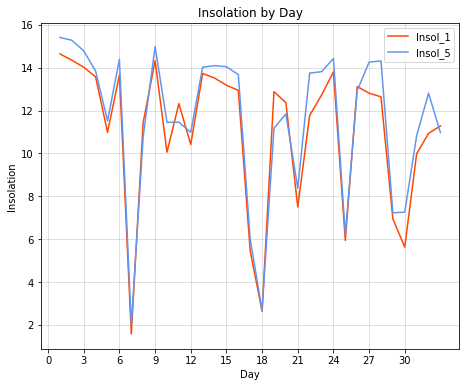

In [19]:
fig = plt.figure(figsize = (7.5,6))
ax = fig.add_subplot(1,1,1)

plt.plot(Insol_day.day, Insol_day.Insol_day_1, color = 'orangered', linestyle = 'solid')
plt.plot(Insol_day.day, Insol_day.Insol_day_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Insolation')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['Insol_1', 'Insol_5'])

plt.title('Insolation by Day')

plt.show()

#### - 일사량 역시 온도와 높은 상관관계를 보인다. 아래에서 종합적으로 확인할 예정이다.

### - 습도

In [20]:
a = train.groupby('day')['Humid_1'].agg([('Humid_day_1', 'mean')]).reset_index()
b = train.groupby('day')['Humid_2'].agg([('Humid_day_2', 'mean')]).reset_index()
c = train.groupby('day')['Humid_3'].agg([('Humid_day_3', 'mean')]).reset_index()
d = train.groupby('day')['Humid_4'].agg([('Humid_day_4', 'mean')]).reset_index()
e = train.groupby('day')['Humid_5'].agg([('Humid_day_5', 'mean')]).reset_index()

Humid_day = pd.merge(a,b, left_on = 'day', right_on = 'day', how = 'left')
Humid_day = pd.merge(Humid_day,c, left_on = 'day', right_on = 'day', how = 'left')
Humid_day = pd.merge(Humid_day,d, left_on = 'day', right_on = 'day', how = 'left')
Humid_day = pd.merge(Humid_day,e, left_on = 'day', right_on = 'day', how = 'left')

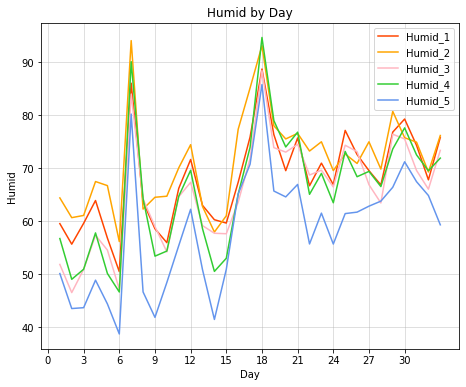

In [21]:
fig = plt.figure(figsize = (7.5,6))
ax = fig.add_subplot(1,1,1)

colors = ['orangered','orange','lightpink','limegreen','cornflowerblue']

plt.plot(Humid_day.day, Humid_day.Humid_day_1, color = 'orangered', linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_2, color = 'orange', linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_3, color = 'lightpink', linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_4, color = 'limegreen',linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Humid')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['Humid_1','Humid_2','Humid_3','Humid_4','Humid_5',])

plt.title('Humid by Day')

plt.show()

#### - 습도는 비와 높은 상관관계를 보인다.

### - 풍향

풍향은 주어진 데이터로서의 의미보다는 방향으로서의 의미가 중요하다고 판단하여, 본 분석에서는 45도씩 방향을 구분하여 원핫인코딩을 진행하였다.

Text(0.5, 0, 'Time')

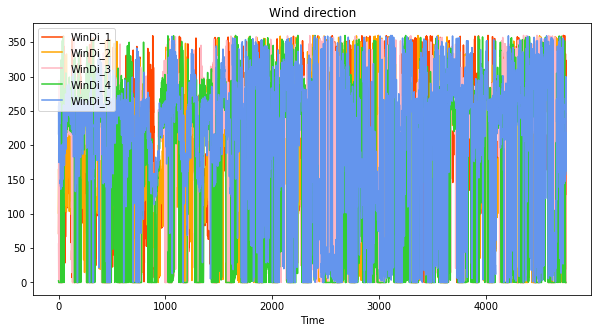

In [22]:
plt.figure(figsize=(10,5))
for i in range(len(Winddirection)):
    plt.plot(train[Winddirection[i]], color=colors[i], label=Winddirection[i])
    plt.legend()
plt.title('Wind direction')
plt.xlabel('Time')

### - 온도와 일사량 비교

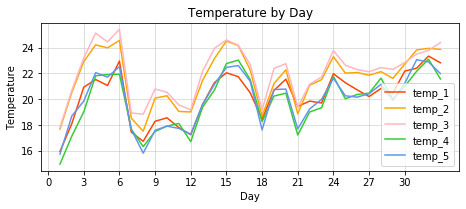

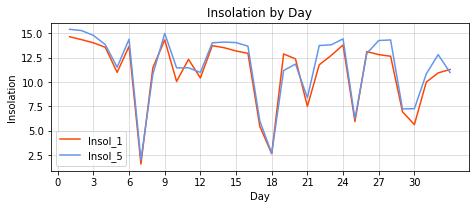

In [23]:
fig = plt.figure(figsize = (7.5,6))
ax = fig.add_subplot(2,1,1)

colors = ['orangered','orange','lightpink','limegreen','cornflowerblue']

plt.plot(temp_day.day, temp_day.평균기온_1, color = 'orangered', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_2, color = 'orange', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_3, color = 'lightpink', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_4, color = 'limegreen',linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Temperature')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5',])

plt.title('Temperature by Day')


fig = plt.figure(figsize = (7.5,6))
ax = fig.add_subplot(2,1,2)

plt.plot(Insol_day.day, Insol_day.Insol_day_1, color = 'orangered', linestyle = 'solid')
plt.plot(Insol_day.day, Insol_day.Insol_day_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Insolation')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['Insol_1', 'Insol_5'])

plt.title('Insolation by Day')

plt.show()

#### - 온도가 낮은 날에는 일사량이 낮으며 온도가 높은 날에는 일사량이 높은 흐름을 확인할 수 있다.

### - 온도, 비, 습도 비교

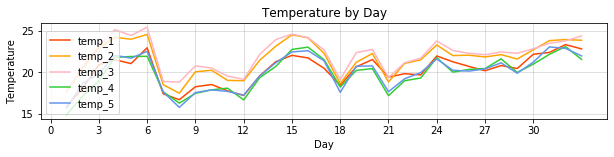

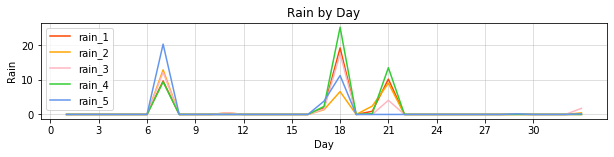

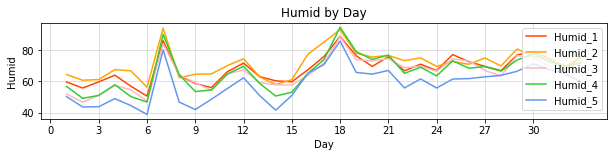

In [24]:
fig = plt.figure(figsize = (10.15,6))
ax = fig.add_subplot(3,1,1)


plt.plot(temp_day.day, temp_day.평균기온_1, color = 'orangered', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_2, color = 'orange', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_3, color = 'lightpink', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_4, color = 'limegreen',linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Temperature')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5',])

plt.title('Temperature by Day')

fig = plt.figure(figsize = (10.15,6))
ax = fig.add_subplot(3,1,2)


plt.plot(rain_day.day, rain_day.Rain_day_1, color = 'orangered', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_2, color = 'orange', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_3, color = 'lightpink', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_4, color = 'limegreen',linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Rain')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['rain_1','rain_2','rain_3','rain_4','rain_5',])

plt.title('Rain by Day')

fig = plt.figure(figsize = (10.15,6))
ax = fig.add_subplot(3,1,3)


plt.plot(Humid_day.day, Humid_day.Humid_day_1, color = 'orangered', linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_2, color = 'orange', linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_3, color = 'lightpink', linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_4, color = 'limegreen',linestyle = 'solid')
plt.plot(Humid_day.day, Humid_day.Humid_day_5, color = 'cornflowerblue', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Humid')

major_ticks_x = np.arange(0, 33, 3)
ax.set_xticks(major_ticks_x)
ax.grid(which='major', alpha=0.5)

plt.legend(['Humid_1','Humid_2','Humid_3','Humid_4','Humid_5',])

plt.title('Humid by Day')

plt.show()

#### - 온도가 낮아지는 시점이 비가 온 시점과 일치함을 확인할 수 있으며, 비가 오는 시점에 습도 또한 높음을 확인할 수 있다.

## 종합

### - 각 변수별 흐름을 시각화한 결과,  [일사량, 강수, 습도]가 기온과 높은 상관관계를 확인할 수 있었다.
### - 단, 습도와 강수는 역시 높은 관계를 보인다.
### - 일사량은 기온과 양의 상관관계를 보이며, 강수와 습도는 온도와 음의 상관관계를 보인다.
### - 이를 바탕으로 Feature Engineering단계에서는 '일사량', '강수', '습도', '기온' 변수를 적극적으로 활용하며, 나머지 지표들은 응용하여 활용하는 방향을 설정하였다.

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

## 1) Time 변수

In [25]:
time =pd.DataFrame(X_data.id.apply(lambda x:x%144))
time.columns = ['minute']
time['30min'] = time.minute.apply(lambda x:x//3 +1)
time['hour'] = time.minute.apply(lambda x:x//6+1)
time['day'] = time.index//144+1
X_data = pd.concat([X_data,time],axis=1)

## 2) Rain, Insolation 10분단위 변화량

In [26]:
X_data_in_diff_y = X_data
X_data_in_diff_y['Insol_1_10min'] = X_data_in_diff_y['Insol_1'].diff()
X_data_in_diff_y['Insol_5_10min'] = X_data_in_diff_y['Insol_5'].diff()

X_data_in_diff_y

Insol_10min = ['Insol_1_10min','Insol_5_10min']
Rain_10min = ['Rain_1_10min','Rain_2_10min','Rain_3_10min','Rain_4_10min','Rain_5_10min']

for i in Insol_10min:
    X_data_in_diff_y.loc[X_data_in_diff_y.query('minute ==0').index,i] = 0
X_data_diff_y = X_data_in_diff_y

X_data_in_diff_y['Rain_1_10min'] = X_data_in_diff_y['Rain_1'].diff()
X_data_in_diff_y['Rain_2_10min'] = X_data_in_diff_y['Rain_2'].diff()
X_data_in_diff_y['Rain_3_10min'] = X_data_in_diff_y['Rain_3'].diff()
X_data_in_diff_y['Rain_4_10min'] = X_data_in_diff_y['Rain_4'].diff()
X_data_in_diff_y['Rain_5_10min'] = X_data_in_diff_y['Rain_5'].diff()

## 3) Rain Insolation 30분단위 변화량

In [27]:
Insol_30min = ['Insol_1_30min','Insol_5_30min']
Rain_30min = ['Rain_1_30min','Rain_2_30min','Rain_3_30min','Rain_4_30min','Rain_5_30min']

rain_1_30min_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,49)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('30min')['Rain_1'].agg('max').diff().fillna(0)/2)
    rain_1_30min_day.loc[i,:] = p
rain_1_30min_day.shape

rain_2_30min_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,49)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('30min')['Rain_2'].agg('max').diff().fillna(0)/2)
    rain_2_30min_day.loc[i,:] = p
rain_2_30min_day.shape

rain_3_30min_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,49)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('30min')['Rain_3'].agg('max').diff().fillna(0)/2)
    rain_3_30min_day.loc[i,:] = p
rain_3_30min_day.shape

rain_4_30min_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,49)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('30min')['Rain_4'].agg('max').diff().fillna(0)/2)
    rain_4_30min_day.loc[i,:] = p
rain_4_30min_day.shape

rain_5_30min_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,49)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('30min')['Rain_5'].agg('max').diff().fillna(0)/2)
    rain_5_30min_day.loc[i,:] = p
rain_5_30min_day.shape

X_data_sample = X_data['id'].reset_index().drop(columns=['index'],axis=1)
rain_30min_day = [rain_1_30min_day,rain_2_30min_day,rain_3_30min_day,rain_4_30min_day,rain_5_30min_day]

for k in range(5):
    rain_list = []
    for i in range(113):
        for j in range(48):
            rain_list.append(rain_30min_day[k].iloc[i,j])
            rain_list.append(rain_30min_day[k].iloc[i,j])
            rain_list.append(rain_30min_day[k].iloc[i,j])
    X_data_sample[Rain[k]] = pd.Series(rain_list)
X_data_sample = X_data_sample.drop(columns=['id'],axis=1)
X_data[Rain_30min] = X_data_sample

insol_1_30min_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,49)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('30min')['Insol_1'].agg('max').diff().fillna(0)/2)
    insol_1_30min_day.loc[i,:] = p
insol_1_30min_day.shape

insol_5_30min_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,49)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('30min')['Insol_5'].agg('max').diff().fillna(0)/2)
    insol_5_30min_day.loc[i,:] = p
insol_5_30min_day.shape

X_data_sample = X_data['id'].reset_index().drop(columns=['index'],axis=1)
insol_30min_day = [insol_1_30min_day,insol_5_30min_day]

for k in range(2):
    insol = []
    for i in range(113):
        for j in range(48):
            insol.append(insol_30min_day[k].iloc[i,j])
            insol.append(insol_30min_day[k].iloc[i,j])
            insol.append(insol_30min_day[k].iloc[i,j])
    X_data_sample[Insolation[k]] = pd.Series(insol)



X_data_sample = X_data_sample.drop(columns=['id'],axis=1)
X_data[Insol_30min] = X_data_sample

for i in Rain_10min:
    X_data_diff_y.loc[X_data_diff_y.query('minute ==0').index,i] = 0

## 4) Rain, Insol 1시간 단위 변화량

In [28]:
rain_1_hour_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,25)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('hour')['Rain_1'].agg('max').diff().fillna(0)/2)
    rain_1_hour_day.loc[i,:] = p
rain_1_hour_day.shape

rain_2_hour_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,25)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('hour')['Rain_2'].agg('max').diff().fillna(0)/2)
    rain_2_hour_day.loc[i,:] = p
rain_2_hour_day.shape

rain_3_hour_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,25)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('hour')['Rain_3'].agg('max').diff().fillna(0)/2)
    rain_3_hour_day.loc[i,:] = p
rain_3_hour_day.shape

rain_4_hour_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,25)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('hour')['Rain_4'].agg('max').diff().fillna(0)/2)
    rain_4_hour_day.loc[i,:] = p
rain_4_hour_day.shape

rain_5_hour_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,25)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('hour')['Rain_5'].agg('max').diff().fillna(0)/2)
    rain_5_hour_day.loc[i,:] = p
rain_5_hour_day.shape

X_data_sample = X_data['id'].reset_index().drop(columns=['index'],axis=1)
rain_hour_day = [rain_1_hour_day,rain_2_hour_day,rain_3_hour_day,rain_4_hour_day,rain_5_hour_day]

for k in range(5):
    rain_list = []
    for i in range(113):
        for j in range(24):
            rain_list.append(rain_hour_day[k].iloc[i,j])
            rain_list.append(rain_hour_day[k].iloc[i,j])
            rain_list.append(rain_hour_day[k].iloc[i,j])
            rain_list.append(rain_hour_day[k].iloc[i,j])
            rain_list.append(rain_hour_day[k].iloc[i,j])
            rain_list.append(rain_hour_day[k].iloc[i,j])
    X_data_sample[Rain[k]] = pd.Series(rain_list)
X_data_sample = X_data_sample.drop(columns=['id'],axis=1)
X_data[Rain] = X_data_sample

insol_1_hour_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,25)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('hour')['Insol_1'].agg('max').diff().fillna(0)/2)
    insol_1_hour_day.loc[i,:] = p
insol_1_hour_day.shape

insol_5_hour_day = pd.DataFrame(index=range(1,114), columns=[list(map(lambda x:float(x) , range(1,25)))])
for i in range(1,114):
    p = list(X_data[X_data['day']==i].groupby('hour')['Insol_5'].agg('max').diff().fillna(0)/2)
    insol_5_hour_day.loc[i,:] = p
insol_5_hour_day.shape

X_data_sample = X_data['id'].reset_index().drop(columns=['index'],axis=1)
insol_hour_day = [insol_1_hour_day,insol_5_hour_day]

for k in range(2):
    insol = []
    for i in range(113):
        for j in range(24):
            insol.append(insol_hour_day[k].iloc[i,j])
            insol.append(insol_hour_day[k].iloc[i,j])
            insol.append(insol_hour_day[k].iloc[i,j])
            insol.append(insol_hour_day[k].iloc[i,j])
            insol.append(insol_hour_day[k].iloc[i,j])
            insol.append(insol_hour_day[k].iloc[i,j])
    X_data_sample[Insolation[k]] = pd.Series(insol)
X_data_sample = X_data_sample.drop(columns=['id'],axis=1)
X_data[Insolation] = X_data_sample

## 5) 각 X별 평균

In [29]:
X_data['Temp_mean'] = pd.Series(X_data[Temperature].mean(axis=1))
X_data['LocPr_mean'] = pd.Series(X_data[Localpressure].mean(axis=1))
X_data['SeaPr_mean'] = pd.Series(X_data[Seapressure].mean(axis=1))
X_data['WinSp_mean'] = pd.Series(X_data[Windspeed].mean(axis=1))
X_data['Rain_mean'] = pd.Series(X_data[Rain].mean(axis=1))
X_data['Insol_mean'] = pd.Series(X_data[Insolation].mean(axis=1))
X_data['Humid_mean'] = pd.Series(X_data[Humid].mean(axis=1))
X_data['Rain_10min_mean'] = pd.Series(X_data[Rain_10min].mean(axis=1))
X_data['Insol_10min_mean'] = pd.Series(X_data[Insol_10min].mean(axis=1))
X_data['Rain_30min_mean'] = pd.Series(X_data[Rain_30min].mean(axis=1))
X_data['Insol_30min_mean'] = pd.Series(X_data[Insol_30min].mean(axis=1))

## 6) 풍향 원핫인코딩

In [30]:
for i in range(1,6):
    a = 'WinDi_' + str(i)
    X_data[a] = X_data[a].apply(lambda x:x//45)
X_data[['WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5']] = X_data[['WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5']].astype(str)
X_data = pd.get_dummies(X_data, columns=['WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5'])

## 7) Dew points 
### - relationship between temp and humidity

- 이슬점 공식 : 기온 - (100 - 상대습도)/5 

    5개의 기온센서와 상대습도센서의 위치를 알 수 없으므로 기온과 상대습도의 평균을 이용하여 구함.

In [31]:
def dew_points(t, rh):
    dp = t - (100-rh)/5
    return dp

X_data['Dewpoint'] = X_data.apply(lambda x: dew_points(x['Temp_mean'], x['Humid_mean']), axis=1)

## 8) 공기밀도 - 다른 분포와 다른 모습

- 공기밀도 수식 : 기압과 온도를 이용
    
    rou = LocPr * 100 / (287.05 * ( 15 + 273.15))

    rou를 hPa단위에서 Pa로 바꾸기 위해 100을 곱해줌
                         
참고자료 (https://www.brisbanehotairballooning.com.au/calculate-air-density/) 에서 참조

In [32]:
def density_air(t,lp):
    rou = lp/(287.05*(273.15+t))*100
    return rou


X_data['Air_density_mean'] = X_data.apply(lambda x: density_air(x['Temp_mean'], x['LocPr_mean']), axis=1)

## 9) 시간대별 구분

In [33]:
def tense(x):
    if 0 <= x < 6:
        return 0 # 새벽
    elif 6 <= x < 12:
        return 1 # 오전
    elif 12 <= x < 18:
        return 2 # 오후
    elif 18 <= x <= 24:
        return 3 # 밤
    
X_data['hour'] = X_data.apply(lambda x: tense(x['hour']), axis=1)
X_data[['hour']] = X_data[['hour']].astype(str)
X_data = pd.get_dummies(X_data, columns=['hour'])

## 10) Wind Chill (체감온도)

- 체감온도 수식 : 35.74 + (0.6215 x Fahrenheit) - (35.75 x (WindSpeed(mph)^0.16)) + (0.4275 x Fahrenheit x (WindSpeed(mph)^0.16))


    - Celsius to Fahrenheit : (1.8 x celsius) + 32
    - m/s to mph : 2.23694 x speed(m/h)
    
**참고자료 (https://www.weather.gov/media/epz/wxcalc/windChill.pdf)**

In [34]:
def wc(t, s):
    #섭씨 -> 화씨
    f = 1.8*t+32
    
    # m/s -> mph
    s = 2.23694 * s
    
    fer_chill = 35.74 + (.6215*f)-(35.75*(s**0.16)) + (0.4275*f*(s**0.16)) 
    
    # 화씨 체감온도 -> 섭씨 체감온도
    cel_chill = (fer_chill - 32)/1.8
    
    return cel_chill

X_data['Windchill'] = X_data.apply(lambda x: wc(x['Temp_mean'], x['WinSp_mean']), axis=1)

## 11) SSI
### - relationship between Temp & humidity

- SSI(Summer Simmer Index) = 1.98 x (Fahrenheit - (0.55 - 0.0055 x (Relative Humidity)) x (Fahrenheit - 58)) - 56.83


    - Celsius to Fahrenheit : (1.8 x celsius) + 32
    
**참고자료 (https://ncalculators.com/meteorology/summer-simmer-index-calculator.htm)**

In [35]:
def SSI(t, rh):
    f = 1.8*t+32
    ssi = 1.98*(f-(0.55-(0.0055*rh))*(f-58)) - 56.83
    if ssi < 70:
        return 0 # cool
    elif 70 <= ssi < 77:
        return 1 # moderately cool
    elif 77 <= ssi < 83:
        return 2 # comfortable
    elif 83 <= ssi < 91:
        return 3 # moderately warm
    elif 91 <= ssi < 100:
        return 4 # warm
    elif 100 <= ssi < 112:
        return 5 # very warm
    elif 112 <= ssi < 125:
        return 6 # extremely warm
    elif 125 <= ssi < 150:
        return 7 # dangerously warm
    else:
        return 8 # ssi> 150 -> life threatening
    
X_data['SSI'] = X_data.apply(lambda x: SSI(x['Temp_mean'], x['Humid_mean']), axis=1)
X_data[['SSI']] = X_data[['SSI']].astype(str)
X_data = pd.get_dummies(X_data, columns=['SSI'])

## 12) 고도

- 고도 = 44,330 x {1-(p/p0)^0.190295}
    
    
    - p0 : 해수면의 대기압
    - p  : 측정하고자 하는 고도의 위치의 대기압 -> 현지기압 대입

**참고자료 (http://www.koreadigital.com/sciencecube_board/1234) pdf 참고**

In [36]:
def altitude(lp, sp):
    al = 44330*(1-(lp/sp)**0.190295)
    return al

X_data['Altitude'] = X_data.apply(lambda x: altitude(x['LocPr_mean'], x['SeaPr_mean']), axis=1)

## 13) 관측소별 강수량 평균

In [37]:
X_data['Rain_all_m'] = (X_data.Rain_1 + X_data.Rain_2 + X_data.Rain_3 + X_data.Rain_4 + X_data.Rain_5) / 5 

## 14) 비온날 안온날 0/1

In [38]:
def rain(x):
    if x > 0:
        return 1
    else:
        return 0
    
X_data['Rain_OX'] = X_data.apply(lambda x: rain(x['Rain_all_m']),axis=1)

## 15) 시간별 평균 온도와 관측소별 편차

In [39]:
X_data['Temp_1_diff'] = X_data['Temp_mean'] - X_data['Temp_1']
X_data['Temp_2_diff'] = X_data['Temp_mean'] - X_data['Temp_2']
X_data['Temp_3_diff'] = X_data['Temp_mean'] - X_data['Temp_3']
X_data['Temp_4_diff'] = X_data['Temp_mean'] - X_data['Temp_4']
X_data['Temp_5_diff'] = X_data['Temp_mean'] - X_data['Temp_5']

## 16) 증기압

- 위에서 구한 Dewpoint를 이용한 VaporPressure 수식 :

    e = 6.11 x 10^(7.5 x Dewpoint/(237.7 + Dewpoint))
    
    
**참고자료 : (https://www.aprweather.com/pages/calc.htm) 에서 'vapor pressure from dew point' 참고**

In [40]:
def vapor_p(x):
    e = 6.11*10**(7.5*x/(237.7+x))
    return e

X_data['Vapor_pressure_mean'] = X_data.apply(lambda x: vapor_p(x['Dewpoint']), axis=1)

## 17) 혼합비

- 위에서 구한 증기압과 기압을 이용한 혼합비 수식:
    
    w = 621.97 * (증기압 / (기압 - 증기압))

참고자료 : (https://www.weather.gov/media/epz/wxcalc/mixingRatio.pdf) 에서 'Pressure Conversion' 참고

In [41]:
def mr(e, lp):
    w = 621.97*(e/(lp-e))
    return w

X_data['Mixing_ratio_mean'] = X_data.apply(lambda x: mr(x['Vapor_pressure_mean'], x['LocPr_mean']), axis=1)

### # 시간기반 계산위한 임시적인 시간데이터 추가

#### # 데이터 혼동을 막기 위해 날짜 계산을 할 데이터프레임을 따로 만든 후, 나중에 병합할 예정

In [42]:
Date_df = X_data
Date_df['date'] = pd.date_range("2020-06-01 00:00:00", "2020-09-21 23:50:00", freq = "10T")
Date_df = Date_df.set_index('date')
df_summary = pd.DataFrame()

## 18) 일자별 일교차

- temp1~5를 하루 단위로 자른 후 max - min으로 일교차를 만들어 적용

In [43]:
df_summary['change_temp1'] = Date_df['Temp_1'].resample('1D').max() - Date_df['Temp_1'].resample('1D').min()
df_summary['change_temp2'] = Date_df['Temp_2'].resample('1D').max() - Date_df['Temp_2'].resample('1D').min()
df_summary['change_temp3'] = Date_df['Temp_3'].resample('1D').max() - Date_df['Temp_3'].resample('1D').min()
df_summary['change_temp4'] = Date_df['Temp_4'].resample('1D').max() - Date_df['Temp_4'].resample('1D').min()
df_summary['change_temp5'] = Date_df['Temp_5'].resample('1D').max() - Date_df['Temp_5'].resample('1D').min()

## 19) 일자별 평균

- temp 1~5를 하루 단위로 묶어서 평균온도 적용

In [44]:
df_summary['mean_temp1_day'] = Date_df['Temp_1'].resample('1D').mean()
df_summary['mean_temp2_day'] = Date_df['Temp_2'].resample('1D').mean()
df_summary['mean_temp3_day'] = Date_df['Temp_3'].resample('1D').mean()
df_summary['mean_temp4_day'] = Date_df['Temp_4'].resample('1D').mean()
df_summary['mean_temp5_day'] = Date_df['Temp_5'].resample('1D').mean()

In [45]:
Date_df_X = pd.DataFrame()

### 아래 과정을 통해 원래 데이터에 병합

In [46]:
Date_df_X['change_temp1'] = df_summary.change_temp1.repeat(144)
Date_df_X['change_temp2'] = df_summary.change_temp2.repeat(144)
Date_df_X['change_temp3'] = df_summary.change_temp3.repeat(144)
Date_df_X['change_temp4'] = df_summary.change_temp4.repeat(144)
Date_df_X['change_temp5'] = df_summary.change_temp5.repeat(144)

Date_df_X['mean_temp1_day'] = df_summary.mean_temp1_day.repeat(144)
Date_df_X['mean_temp2_day'] = df_summary.mean_temp2_day.repeat(144)
Date_df_X['mean_temp3_day'] = df_summary.mean_temp3_day.repeat(144)
Date_df_X['mean_temp4_day'] = df_summary.mean_temp4_day.repeat(144)
Date_df_X['mean_temp5_day'] = df_summary.mean_temp5_day.repeat(144)

Date_df_x = Date_df_X.reset_index()
Date_df_x = Date_df_x.drop(['date'], axis = 1)

X_data['change_temp1'] = Date_df_x.change_temp1
X_data['change_temp2'] = Date_df_x.change_temp2
X_data['change_temp3'] = Date_df_x.change_temp3
X_data['change_temp4'] = Date_df_x.change_temp4
X_data['change_temp5'] = Date_df_x.change_temp5

X_data['mean_temp1_day'] = Date_df_x.mean_temp1_day
X_data['mean_temp2_day'] = Date_df_x.mean_temp2_day
X_data['mean_temp3_day'] = Date_df_x.mean_temp3_day
X_data['mean_temp4_day'] = Date_df_x.mean_temp4_day
X_data['mean_temp5_day'] = Date_df_x.mean_temp5_day

## 20) 일평균기온과 현재기온의 편차

- 앞에서 구해둔 하루단위 평균 - temp기온

In [47]:
X_data['diff_day_temp1'] = X_data['mean_temp1_day'] - X_data['Temp_1']
X_data['diff_day_temp2'] = X_data['mean_temp2_day'] - X_data['Temp_2']
X_data['diff_day_temp3'] = X_data['mean_temp3_day'] - X_data['Temp_3']
X_data['diff_day_temp4'] = X_data['mean_temp4_day'] - X_data['Temp_4']
X_data['diff_day_temp5'] = X_data['mean_temp5_day'] - X_data['Temp_5']

## 21) 일교차 평균

- 위에 X_data['Temp_mean']이 있기 때문에 제거

In [48]:
# X_data['change_temp_mean'] = (X_data['change_temp1']+X_data['change_temp2']+ X_data['change_temp3']+X_data['change_temp4']+X_data['change_temp5']) / 5

## 22) 온도평균과 일사량평균의 편차

- 변수 중요도를 확인해 본 결과 Insolation이 Temp에 주는 영향이 크기 때문에 Insol과 Temp의 차이를 보고자 함

In [49]:
X_data['diff_Temp_ins_mean'] = X_data['Temp_mean'] - X_data['Insol_mean']

## 23) 비와 일사량

- 일사량과 비는 일반적으로 반비례를 갖기 때문에, 이 차이가 날씨를 판별 할 수 있다고 여겨 생성

In [50]:
X_data['rain_ins']=X_data.apply(lambda x: x['Insol_mean']-x['Rain_mean'],axis=1)

## 24) 시간대별 평균과 현재 일사량의 차이

- 평균과 실제와의 차이를 보고자 함

In [51]:
X_data['Ins_diff_1'] = X_data['Insol_mean'] - X_data['Insol_1']
X_data['Ins_diff_5'] = X_data['Insol_mean'] - X_data['Insol_5']

## 25) 기압과 기온의 관계  (Pred_Temp)

- 논문 '온도와 강수를 이용하여 일별 일사량을 추정하기 위한 심층 신경망 모델 개발' 인용

In [52]:
X_data['Pred_Temp'] = X_data['Temp_mean']*(1000/X_data['LocPr_mean'])**(8.314/1.005)

## 26) 포화 수증기압

- 위에서 구한 평균온도를 이용한 포화 수증기압 수식 :

    VP = 6.11 * e ** (17.27 * 평균온도 / 237.3 + 평균온도)
    
    
**참고자료 : (https://makerjeju.tistory.com/27) 에서 'Vapor Pressure(단위 Pa)' 참고**

In [53]:
def es(t):
    return 6.11*np.exp(17.27*t/(t+273.16-35.86))

X_data['Vapor_pressure_over'] = X_data.apply(lambda x: es(x['Temp_mean']),axis=1)

## 27) 공기중 수증기량 

- 위에서 주어진 LocPr의 평균인 LocPr_mean을 이용한 공기중 수증기량 공식

    s = 0.622 * e/(LocPr_mean-0.378*e)

**참고자료 : (https://sambumts.tistory.com/419) 에서 'g) 공기중의 비습 계산식' 인용

In [54]:
def va(e,P):
    s = 0.622 * e / (P-e)
    return s

X_data['Vapor_amount'] = X_data.apply(lambda x: va(x['Vapor_pressure_mean'],x['LocPr_mean']),axis=1)

## 28) 포화 절대 습도

- 위에서 주어진 포화수증기량과 평균온도를 이용한 포화 절대 습도 공식

    D = 804 * 화수증기량/(표준1기압(=1013.25hPa) * (1+0.00366*평균온도))

**참고자료 : (https://sambumts.tistory.com/419) 에서 'g) 공기중의 비습 계산식' 인용

In [55]:
def ps(e,t):
    ps = 804*e/((1013.25*(1+0.00366*t)))
    return ps

X_data['Absolute_Humidity'] = X_data.apply(lambda x:ps(x['Vapor_pressure_over'],x['Temp_mean']),axis=1)

### date 관련, 중복열 삭제

In [56]:
X_data = X_data.drop(['date','mean_temp1_day','mean_temp2_day','mean_temp3_day',
                     'mean_temp4_day','mean_temp5_day','day','minute','30min'], axis = 1)

In [57]:
X_data.head(10)

,id,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5,LocPr_1,LocPr_2,LocPr_3,LocPr_4,...,diff_day_temp4,diff_day_temp5,diff_Temp_ins_mean,rain_ins,Ins_diff_1,Ins_diff_5,Pred_Temp,Vapor_pressure_over,Vapor_amount,Absolute_Humidity
0,0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,...,6.7625,5.040972,10.62,0.0,0.0,0.0,10.775895,12.803408,0.005843,9.779218
1,1,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,...,6.6625,5.440972,10.42,0.0,0.0,0.0,10.569455,12.633670,0.005793,9.656377
2,2,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,...,6.9625,6.040972,10.26,0.0,0.0,0.0,10.408885,12.499308,0.005856,9.559071
3,3,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,1008.7,...,7.2625,6.340972,10.12,0.0,0.0,0.0,10.270257,12.382773,0.005868,9.474628
4,4,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,1008.7,...,7.5625,6.340972,10.00,0.0,0.0,0.0,10.146794,12.283647,0.005884,9.402765
5,5,9.1,12.0,12.0,7.3,9.1,988.9,989.6,1002.3,1008.7,...,7.6625,6.640972,9.90,0.0,0.0,0.0,10.048656,12.201576,0.005918,9.343240
6,6,9.1,12.0,11.8,7.1,8.6,988.8,989.6,1002.3,1008.7,...,7.8625,7.140972,9.72,0.0,0.0,0.0,9.869225,12.055063,0.005900,9.236922
7,7,8.9,11.9,11.8,7.1,8.8,988.9,989.7,1002.4,1008.7,...,7.8625,6.940972,9.70,0.0,0.0,0.0,9.842390,12.038879,0.005911,9.225174
8,8,9.0,11.9,11.6,7.0,8.8,988.9,989.6,1002.4,1008.7,...,7.9625,6.940972,9.66,0.0,0.0,0.0,9.803427,12.006570,0.005912,9.201717
9,9,8.8,11.8,11.5,7.1,8.5,988.9,989.6,1002.5,1008.6,...,7.8625,7.240972,9.54,0.0,0.0,0.0,9.681646,11.910099,0.005921,9.131656


## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

## A) ML

In [58]:
Y_data =  ['Y00','Y01','Y02','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']

## Train Test 데이터셋 분리

In [59]:
train_y = train[Y_data]
train_X = X_data.iloc[:4752,:]
train_y = train[Y_data]
train = pd.concat([train_X,train_y],axis=1)
test = X_data.iloc[4752:,:]
train_30 = train.iloc[:4320,:]
train_3 = train.iloc[4320:,:]

### Train의 Y18은 평균값으로 대치한다

Text(0.5, 1, 'Correlation Heatmap')

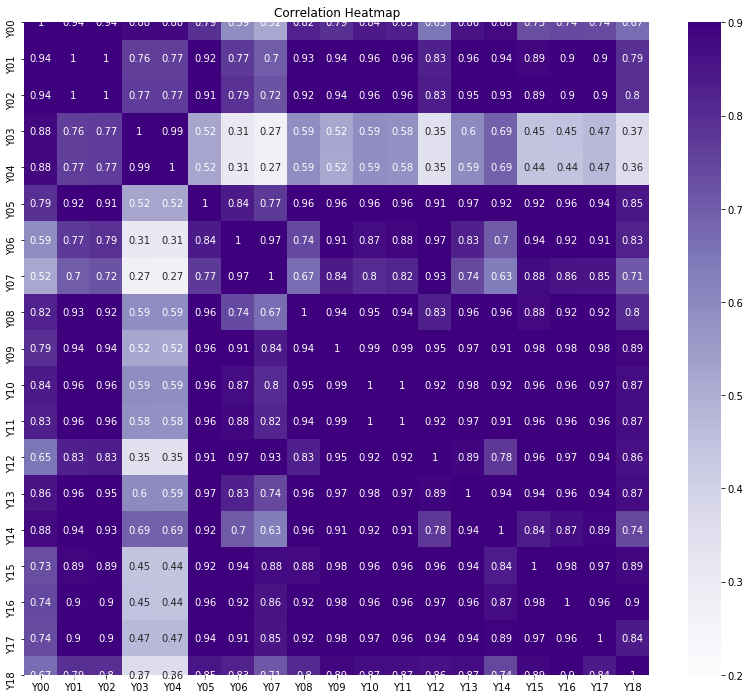

In [60]:
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = 'Purples',  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap')

#### - 유의미한 관계가 보인다고 판단되는 상관계수가 0.81이상인 Y들로 30일 Y18을 채움

In [61]:
Y = ['Y05','Y06','Y09','Y10','Y11','Y12','Y13','Y15','Y16','Y17']

In [62]:
train_30['Y18'] = np.mean(train_30[Y], axis = 1)

C:\Users\onest\Anaconda3\envs\tf2.0-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### predict Y18 (평균으로 대치한 Y18)

In [63]:
train = pd.concat([train_30, train_3])

## GB (랜덤서치)

%%time

X = train.iloc[:, 1:142]
y = train['Y18']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=13, test_size = 0.3)
    
gb = GradientBoostingRegressor()
    
params_gb = {"max_depth":sp_randint(3, 20),
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": sp_randint(2,20),
              "min_samples_leaf": sp_randint(1,15),
            'learning_rate':uniform(0.01, 1),
            'n_estimators':sp_randint(10,300)}
 
       
gb_RS = RandomizedSearchCV(gb, param_distributions=params_gb,n_iter=300, 
                           verbose = True, cv = 3)
gb_RS.fit(X_train,y_train)
    
print(gb_RS.best_params_)
    
pred_gb_RS = gb_RS.predict(X_test)
print(metrics.r2_score(y_test,pred_gb_RS))
    
mse = np.mean((pred_gb_RS - y_test)**2)
print(mse)
    
    
pred_gb = gb_RS.predict(test.iloc[:,1:142]) 

In [64]:
%%time

X = train.iloc[:, 1:142]
y = train['Y18']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=13, test_size = 0.3)
    
gb = GradientBoostingRegressor(learning_rate = 0.05141763076328964,max_depth= 16, 
             max_features =  'sqrt', min_samples_leaf = 12, 
             min_samples_split= 6, n_estimators =  288, random_state=1)
gb.fit(X_train,y_train)
pred_gb = gb.predict(X_test)
print(metrics.r2_score(y_test,pred_gb))

mse = np.mean((pred_gb - y_test)**2)
print(mse)
    
pred_gb = gb.predict(test.iloc[:,1:142]) 

0.9967921524997395
0.2302959389618792
Wall time: 7.63 s


In [65]:
pred_gb

array([20.1773898 , 20.09635727, 20.18755102, ..., 25.28706032,
       25.23365841, 25.29432845])

## XGB (랜덤서치)

%%time

X = train.iloc[:, 1:142]
y = train['Y18']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=14, test_size = 0.3)
    
xgb = XGBRegressor()
    
params_xgb = {"max_depth":sp_randint(3,20),
              "min_child_weight" : sp_randint(4,10),
            'learning_rate':uniform(0.01,1),
            'n_estimators':sp_randint(10,500)}
    
xgb_RS = RandomizedSearchCV(xgb, param_distributions=params_xgb,n_iter=500, 
                            verbose = True, cv = 3)
xgb_RS.fit(X_train,y_train)
    
print(xgb_RS.best_params_)
    
pred_xgb_RS = xgb_RS.predict(X_test)
print(metrics.r2_score(y_test,pred_xgb_RS))
    
mse = np.mean((pred_xgb_RS - y_test)**2)
print(mse)
    
    
pred_xgb = xgb_RS.predict(test.iloc[:,1:142]) 

In [66]:
%%time

X = train.iloc[:, 1:142]
y = train['Y18']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=14, test_size = 0.3)
    
xgb = XGBRegressor(learning_rate = 0.04676877362294895, 
                   max_depth = 19, min_child_weight = 8, 
                   n_estimators = 215)
    

xgb.fit(X_train,y_train)
     
pred_xgb = xgb.predict(X_test)
print(metrics.r2_score(y_test,pred_xgb))
    
mse = np.mean((pred_xgb - y_test)**2)
print(mse)
    
pred_xgb = xgb.predict(test.iloc[:,1:142]) 

0.9957716449495528
0.2963040650849931
Wall time: 10.7 s


In [67]:
pred_xgb

array([20.414341, 20.458546, 20.41438 , ..., 25.877192, 25.898727,
       25.888586], dtype=float32)

## LGBM (랜덤서치)

%%time

X = train.iloc[:, 1:142]
y = train['Y18']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=15, test_size = 0.3)
    
lgb = LGBMRegressor()
    
params_lgb = {'n_estimators' : [50,200],
                'learniing_rate' : [0.01,0.2],
                 'max_depth' : [4,8],
                 'min_child_weight' : [0,4],
                 'colsample_bytree' : [0.5,1],
                 'subsample' : [0.5,1]}
    
    
lgb_RS = RandomizedSearchCV(lgb, param_distributions=params_lgb,n_iter=500, 
                            verbose = True, cv = 3)
lgb_RS.fit(X_train,y_train)
    
print(lgb_RS.best_params_)
    
pred_lgb_RS = lgb_RS.predict(X_test)
print(metrics.r2_score(y_test,pred_lgb_RS))
    
mse = np.mean((pred_lgb_RS - y_test)**2)
print(mse)
    
    
pred_lgb = lgb_RS.predict(test.iloc[:,1:142]) 

In [68]:
%%time

X = train.iloc[:, 1:142]
y = train['Y18']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=15, test_size = 0.3)
    
lgb = LGBMRegressor(subsample = 0.2, n_estimators = 200, min_child_weight = 0,
                    max_depth = 15, learniing_rate = 0.01, colsample_bytree = 0.2)
    
lgb.fit(X_train,y_train)
    
pred_lgb = lgb.predict(X_test)
print(metrics.r2_score(y_test,pred_lgb))
    
mse = np.mean((pred_lgb - y_test)**2)
print(mse)
    
    
pred_lgb = lgb.predict(test.iloc[:,1:142]) 

0.9953091051775924
0.32346233739760344
Wall time: 1.01 s


In [69]:
pred_lgb

array([20.38908897, 20.34845286, 20.3748005 , ..., 26.38519232,
       26.1685039 , 26.11241236])

## G-mean을 통한 기하평균

In [70]:
ens = gmean([pred_gb, pred_xgb, pred_lgb])

In [71]:
ens

array([20.32666157, 20.30055129, 20.32533564, ..., 25.84591527,
       25.76395386, 25.76278604])

In [74]:
ens[0:10]

array([20.32666157, 20.30055129, 20.32533564, 19.9203609 , 19.98361427,
       19.98702034, 19.98161938, 19.87878747, 19.62517258, 19.60110849])

## B) DL

## 6. 결과 및 결언
## Conclusion & Discussion

In [0]:
# 입력하세요.